In [2]:
pip install geopandas


  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/9d/66/ddb1c74c06c858ddbe889c68fea177d1d9c711af553d355417bdef8eaf17/pyogrio-0.9.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/ec/1b/092fff53cbeced411eed2717592e31cadd3e52f0ebaba5f2df3f34913f96/shapely-2.0.5-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   --- ------------------------------------ 30.7/323.6 kB 1.3 MB/s eta 0:00:01
   -

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [6]:
os.chdir('D:\\Assignments_SCMA632\\Data')

In [7]:
data = pd.read_csv("NSSO68.csv")


C:\Users\rache\AppData\Local\Temp\ipykernel_27304\1999170908.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NSSO68.csv")


In [9]:
# Filtering for Punjab
df = data[data['state_1'] == "Pun"]


In [10]:
# Display dataset info
print("Dataset Information:")
print(df.columns)
print(df.head())
print(df.shape)

Dataset Information:
Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)
        slno                                 grp  Round_Centre  FSU_number  \
36170  36171  49099999999999994474263117561856.0             1       49100   
36171  36172  49099999999999994474263117561856.0             1       49100   
36172  36173  49099999999999994474263117561856.0             1       49100   
36173  36174  49099999999999994474263117561856.0             1       49100   
36174  36175  49099999999999994474263117561856.0             1       49100   

       Round  Schedule_Number  Sample  Sector  state  State_Region  ...  \
36170     68               10       1       2      3            32  ...   
36171     68    

In [11]:
# Finding missing values
missing_info = df.isnull().sum()
print("Missing Values Information:")
print(missing_info)


Missing Values Information:
slno              0
grp               0
Round_Centre      0
FSU_number        0
Round             0
                 ..
foodtotal_q       0
state_1           0
Region            0
fruits_df_tt_v    0
fv_tot            0
Length: 384, dtype: int64


In [12]:
# Subsetting the data
punnew = df[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]


In [13]:
# Impute missing values with mean for specific columns
punnew['Meals_At_Home'].fillna(punnew['Meals_At_Home'].mean(), inplace=True)


C:\Users\rache\AppData\Local\Temp\ipykernel_27304\434546172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  punnew['Meals_At_Home'].fillna(punnew['Meals_At_Home'].mean(), inplace=True)


In [15]:
# Finding outliers and removing them
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    return df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]

outlier_columns = ['ricepds_v', 'chicken_q']
for col in outlier_columns:
    punnew = remove_outliers(punnew, col)


In [16]:
# Summarize consumption
punnew['total_consumption'] = punnew[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)



In [17]:
# Summarize and display top consuming districts and regions
def summarize_consumption(group_col):
    summary = punnew.groupby(group_col)['total_consumption'].sum().reset_index()
    summary = summary.sort_values(by='total_consumption', ascending=False)
    return summary

district_summary = summarize_consumption('District')
region_summary = summarize_consumption('Region')


In [18]:
print("Top Consuming Districts:")
print(district_summary.head(4))
print("Region Consumption Summary:")
print(region_summary)

Top Consuming Districts:
    District  total_consumption
8          9        2325.867251
10        11        2119.891498
1          2        1915.249159
3          4        1462.061837
Region Consumption Summary:
   Region  total_consumption
1       2       12260.771807
0       1        8833.509929


In [19]:
# Rename districts and sectors
district_mapping = {
    "1": "Gurdaspur", "2": "Amritsar", "3": "Kapurthala", "4": "Jalandhar", "5": "Hoshiarpur", 
    "6": "Nawanshahr", "7": "Rupnagar", "8": "Fatehgarh Sahib", "9": "Ludhiana",
    "10": "Moga", "11": "Firozpur", "12": "Muktsar", "13": "Faridkot",
    "14": "Bathinda", "15": "Mansa", "16": "Sangrur", "17": "Patiala",
    "18": "SJAS Nagar (Mohali)", "19": "Barnala", "20": "Tarn Taran"
}
sector_mapping = {"2": "URBAN", "1": "RURAL"}

punnew['District'] = punnew['District'].astype(str)
punnew['Sector'] = punnew['Sector'].astype(str)
punnew['District'] = punnew['District'].apply(lambda x: district_mapping.get(x, x))
punnew['Sector'] = punnew['Sector'].apply(lambda x: sector_mapping.get(x, x))


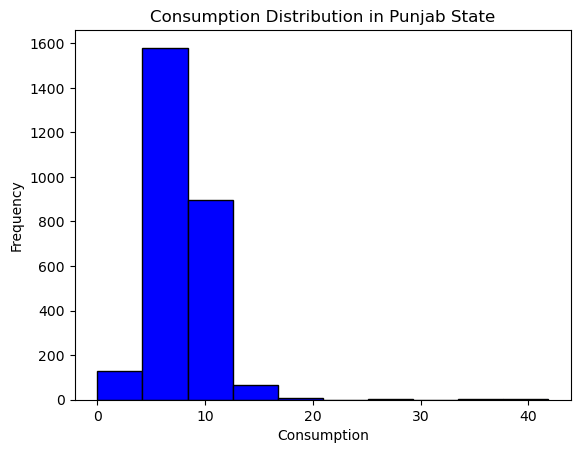

In [20]:
# Plot histogram of total consumption
plt.hist(punnew['total_consumption'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Consumption Distribution in Punjab State')
plt.show()

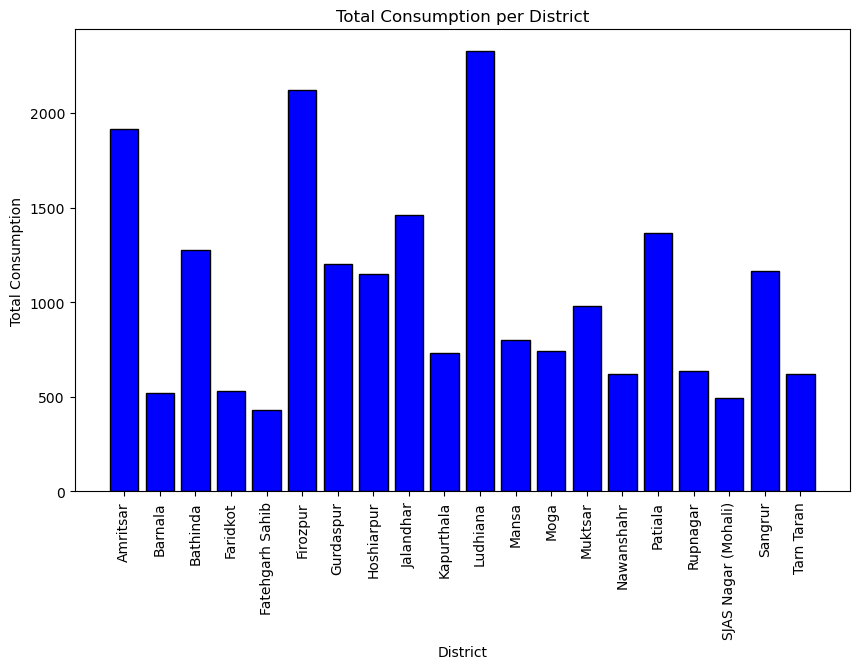

In [21]:
# Bar plot of total consumption per district
pun_consumption = punnew.groupby('District')['total_consumption'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(pun_consumption['District'], pun_consumption['total_consumption'], color='blue', edgecolor='black')
plt.xlabel('District')
plt.ylabel('Total Consumption')
plt.title('Total Consumption per District')
plt.xticks(rotation=90)
plt.show()

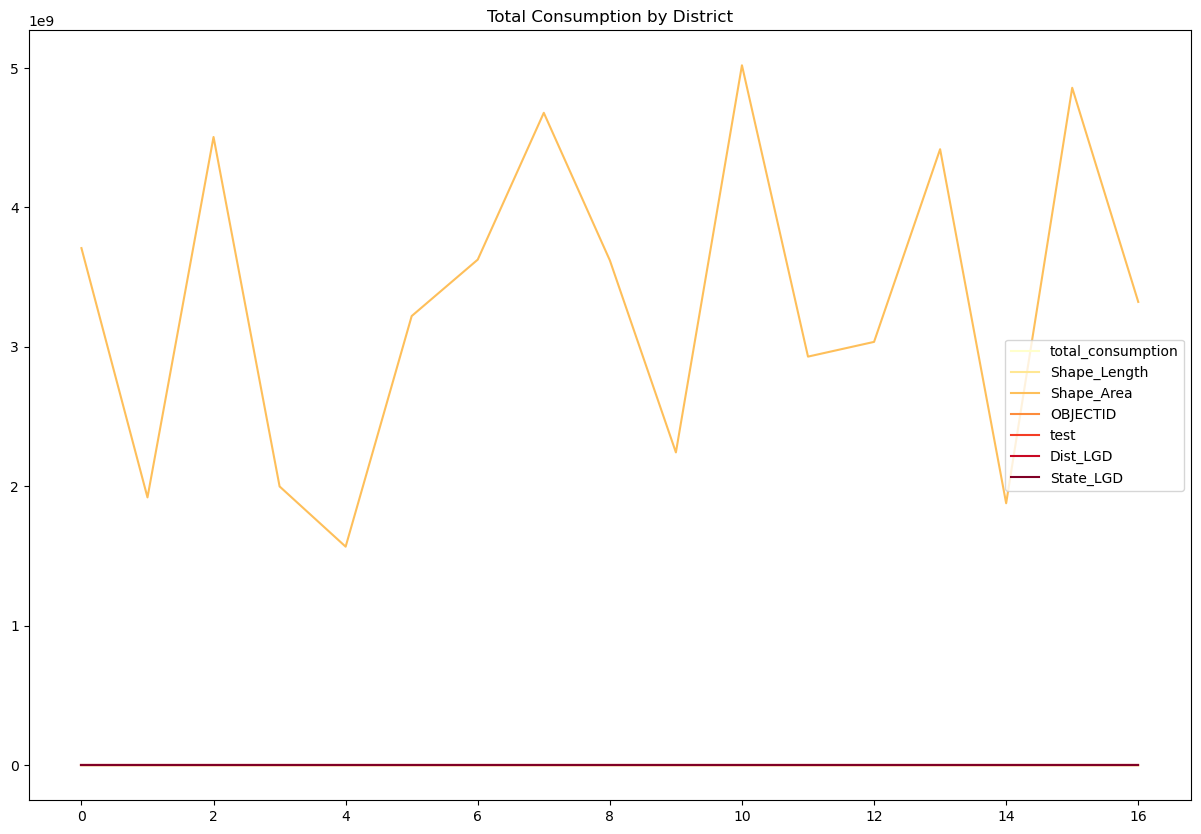

In [23]:
# Plot total consumption on the map
data_map = gpd.read_file("D:\\Assignments_SCMA632\\Data\\PUNJAB_DISTRICTS.geojson")
data_map = data_map.rename(columns={'dtname': 'District'})
data_map_data = pd.merge(pun_consumption, data_map, on='District')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
data_map_data.plot(column='total_consumption', ax=ax, legend=True, cmap='YlOrRd')
plt.title('Total Consumption by District')
plt.show()